# Final project type 1: convex optimization practice
책에 있는 것과 유사?한 연습 문제를 코드로 표현하고 패키지로 풀어 보는 미니 프로젝트입니다. R, Python, Julia, MATLAB에는 각각 `cvxr, cvxpy, convex, cvx` 패키지가 거의 동일하게 만들어져 있습니다. 이 패키지들 중 아무거나 활용해 주어진 문제 상황을 해결해 보세요!

## 1. Implementation of function
다음 concave function $f: \mathbb{R} \rightarrow \mathbb{R},\,\textbf{dom} f = \mathbb{R}_+$가 주어져 있습니다.




$$ f(x) = \begin{cases}
(x+1)/2, & \mbox x > 1 \\
\sqrt{x}, & \mbox 0 \leq x \leq 1
\end{cases} $$



이 함수를 `CVX`패키지의 optimization problem 형식으로 구현하세요. 즉 optimization problem을 풀었을 때 결과값이 위의 함수의 값과 같아야 합니다.

*hint: variable을 적당히 추가해서 풀 수 있습니다.* \
가령 $\text{maximize}\,f(u) + g(v),\,\,\text{subject to}\,\,x = h(u,v)\,(ex:\,x = u+v)...$ 형식으로 표현했을 때 결과값이 $f(x)$와 맞으면 됩니다. 다시 말해 위의 $u$와 $v$에 대한 optimization 문제의 optimal value가 $x < 0$일 때 infeasible, $0 \leq x \leq 1$일 때 $\sqrt{x}$, $x>1$일 때 $(x+1)/2$이 되어야 합니다.

In [1]:
import cvxpy as cp

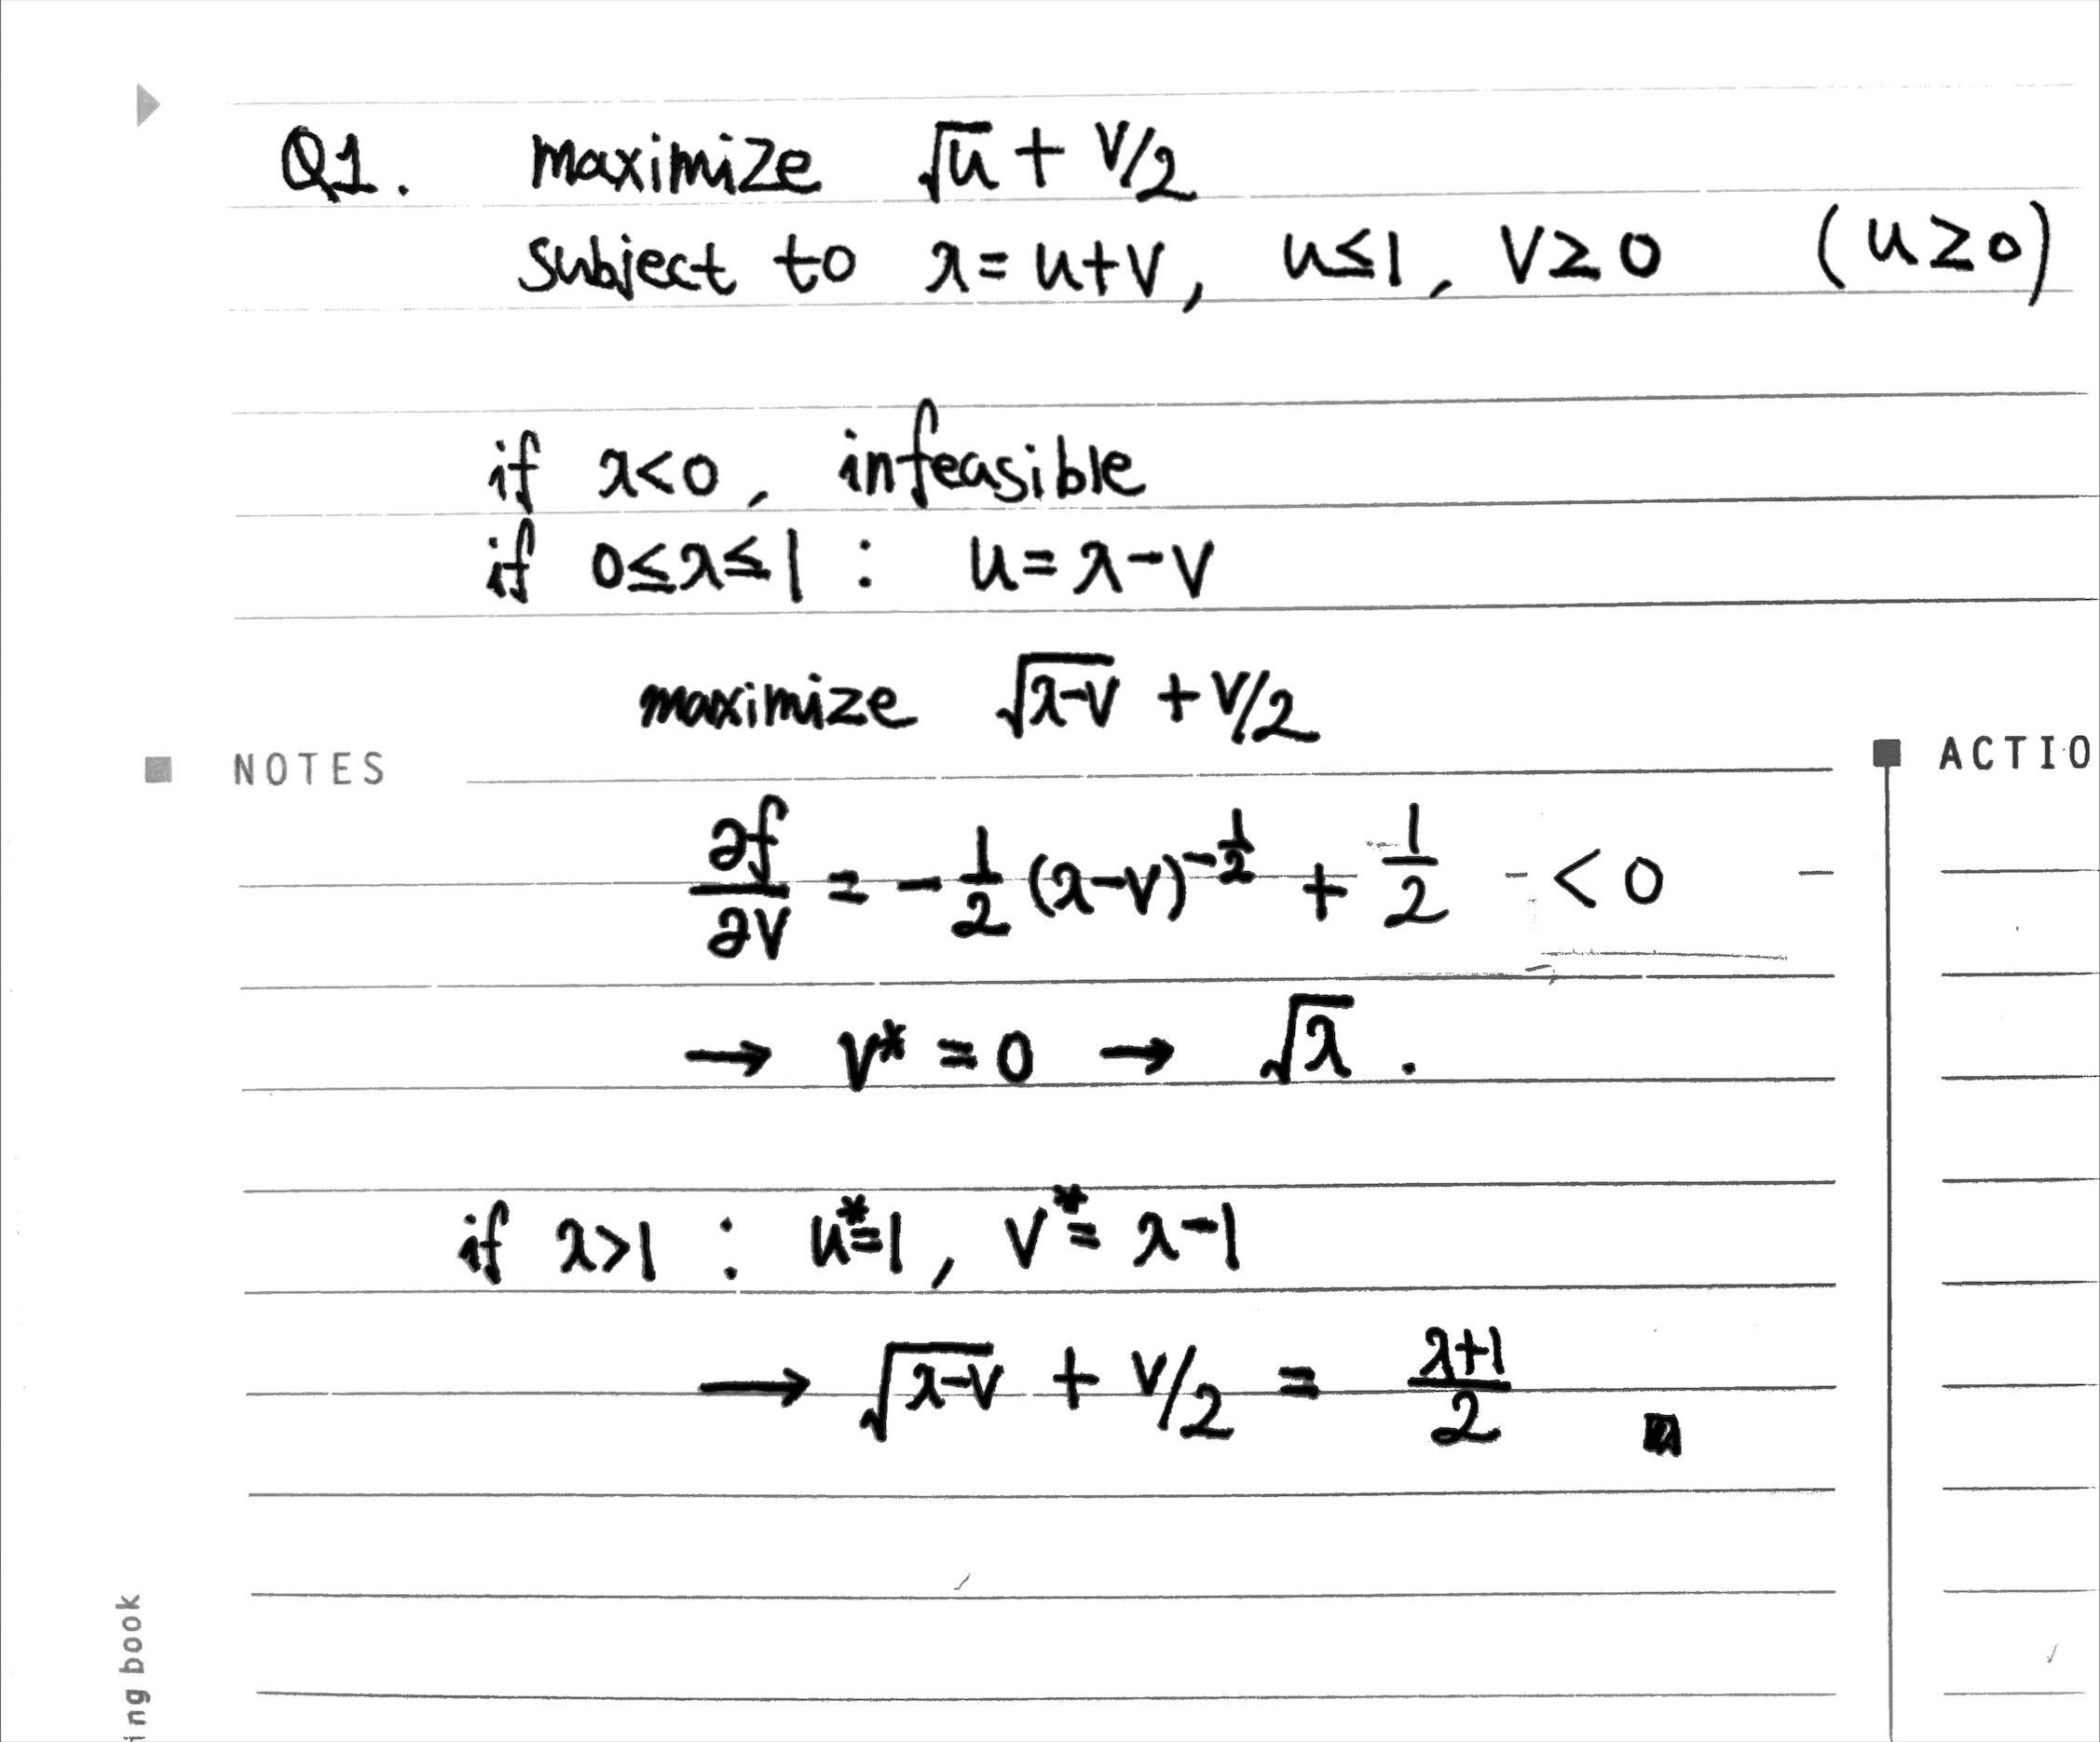

## 2. Censored linear regression
K개의 데이터 셋 $(x, y)$들이 있습니다. 이 중 $M$개의 데이터 셋 $(x_1, y_1),\,...,\,(x_M, y_M)$은 값을 아는 일반적인 데이터 셋입니다. \
그런데, 나머지 데이터 $(x_{M+1}, y_{M+1}),\,...\,(x_K, y_K)$는 y의 값이 없습니다! 이런 데이터를 **censored data**라고 합니다. 가령, 환자 집단에 대한 생존 분석에서 $y$를 사망 연령이라고 할 때, 표본 집단에서 아직 사망하지 않은 사람들의 데이터는 censored data가 됩니다. 이럴 경우 우리가 가지고 있는 정보는 오직 **y 데이터의 lower bound(ex. 연구 기간)** 뿐입니다. 이 lower bound를 $D$라고 합시다. 

이 데이터들에 대해서 least squares problem을 풀고 싶습니다. objective function은 다음과 같이 censored data를 포함해 정의됩니다.

$$J(\beta) = \sum_{i=1}^K (y_i - x_i^\top \beta)^2,\,\,x_i, \beta \in \mathbb{R}^p,\,y_i\in \mathbb{R}$$

1) 데이터 `q2`에 대해 이 문제를 풀고,
2) $\beta_{true}$에 대한 relative error를 censored data를 무시하고 fitting했을 경우와 비교하세요. (주의: `q2.y`의 0 value는 결측치를 의미합니다.)

참고: relative error는 $\frac{\lVert \beta_{true} - \hat{\beta} \rVert_2}{\lVert \beta_{true}\rVert_2}$로 정의됩니다.

In [2]:
# python 기준 초기 설정. R, Julia, MATLAB도 이 값을 써서 유사하게 진행하면 됩니다. 
# python과 달리 나머지 언어들은 numpy 패키지 같은 것이 필요 없고, 기본 함수들을 사용하면 됩니다.
import numpy as np
p = 20 # x feature 수
M = 25 # uncensored data의 개수
K = 100 # 총 데이터 개수
β_true = np.array([[-0.31232848],
                [ 0.33928471],
                [-0.15590853],
                [-0.50178967],
                [ 0.23556889],
                [-1.76360526],
                [-1.09586204],
                [-1.08776574],
                [-0.30517005],
                [-0.47374837],
                [-0.20059454],
                [ 0.35519677],
                [ 0.68951772],
                [ 0.41058968],
                [-0.56497844],
                [ 0.59939069],
                [-0.16293631],
                [ 1.6002145 ],
                [ 0.6816272 ],
                [ 0.0148801 ]])
D = -1.85849413 #lower bound

In [3]:
import pandas as pd
data = pd.read_csv('q2.csv')

In [4]:
data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
0,-11.201894,0.605992,-2.454759,0.045563,0.176614,-0.298426,1.804337,2.912316,1.060903,0.607922,...,-1.077106,0.632956,0.208577,-0.815701,0.400402,-0.488416,-1.410603,-1.033419,-0.918270,1.122871
1,-8.142421,1.978272,0.335854,-1.655557,0.825853,1.207102,0.800215,1.186441,0.857392,0.288278,...,1.007526,0.274830,-1.406585,-0.995646,1.394034,-0.074804,1.562823,-0.715595,0.283256,-2.310862
2,-7.403662,0.083425,-1.546519,-0.778424,-0.451652,0.046494,0.966535,-0.635014,1.597609,0.498389,...,-0.351244,0.076550,-0.628422,-0.475858,-1.470566,-0.709172,0.932744,-1.081364,-1.959578,0.153491
3,-6.413732,-0.250321,-0.052321,0.523791,0.727909,-0.096599,1.635037,0.282871,-0.937371,0.522907,...,-0.482903,0.498134,-0.847970,2.081939,1.227125,-1.407075,0.752502,-0.553323,-0.847878,2.355897
4,-6.186743,-0.178037,0.880932,-0.586190,-0.233675,-1.477150,1.237730,1.022461,1.607310,0.300730,...,0.782327,-0.667418,-1.702026,-1.427234,0.287688,-0.983605,-0.076180,0.365278,-1.042955,-1.758906


In [5]:
x = data.iloc[:,1:].values
y = data.iloc[:,0].values

In [6]:
x_uncensored = x[:M, :]
β = cp.Variable(shape = p)
objective = cp.Minimize(cp.sum_squares(x @ β - y))
constraints = [x[M:,:] @ β >= D]
prob = cp.Problem(objective, constraints)
result = prob.solve()

β_cvx = np.array(β.value).flatten()
fit_cvx = x @ β_cvx

In [7]:
np.linalg.norm(β_true - β_cvx) / np.linalg.norm(β_true)

5.136843766343251

In [8]:
β_ols = np.linalg.inv(x_uncensored.T @ x_uncensored) @ x_uncensored.T @ y[:M]

In [9]:
np.linalg.norm(β_true - β_ols) / np.linalg.norm(β_true)

6.596723204081624

In [10]:
np.sum((x @ β_true - y)**2)

189995.51673385923

In [11]:
np.sum((fit_cvx - y)**2)

281.6618771875786

In [12]:
np.sum((x @ β_ols - y)**2)

845.5069622849951

## 3. Portfolio optimization
세션 때 풀어 본 portfolio optimization의 좀 더 일반화된 버전입니다. (교재 186페이지 참고) 문제 상황은 Asset(ex. 주식) 1, 2, 3, 4가 있을 때, **return의 기댓값을 극대화하면서, 동시에 risk(return의 분산)을 최소화하는 Asset의 최적 구매 비율** $w$를 찾는 것입니다. 

다음과 같이 데이터가 주어져 있습니다. $\bar{p}$는 asset의 가격 변화율((만기 가격 - 현재 가격)/현재 가격)의 기댓값, $\Sigma$는 그 분산을 말합니다.


$$\bar{p} = \begin{bmatrix}
            0.12\\0.10\\0.07\\0.03 \end{bmatrix},\, \Sigma = \begin{bmatrix}
                                                             0.0064 & 0.0008 & -0.0011 & 0\\
                                                             0.0008 & 0.0025 & 0 & 0\\
                                                             -0.0011 & 0 & 0.0004 & 0\\
                                                             0 & 0 & 0& 0 \end{bmatrix}.$$
                                                             
                                                             

이 문제를 optimization problem으로 나타내면 다음과 같습니다.


$$
\begin{array}{ll}
    \text{minimize}   &-\bar{p}^\top w +  \lambda w^\top \Sigma w \\
    \text{subject to} &1^\top w = 1,\,w \succeq 0
\end{array}
$$


기댓값은 maximize, risk는 minimize해야 하므로 minimize로 합쳐서 써 주면 위처럼 표현됩니다.   
이 때 lambda는 sclarization parameter입니다. 우선, **기댓값과 risk는 서로 trade-off 관계에 있습니다.** 높은 수익을 기대하려면 큰 리스크를 감수해야 한다는 것은 지극히 상식적입니다. 이 때 이 둘의 trade-off 관계는 미리 정해야 하는 parameter가 됩니다. $\lambda$가 매우 크다면 기대 수익을 조금만 높게 잡으려 해도, 즉 $\bar{p}$가 큰 asset의 비율을 조금만 늘리려고 해도 목적 함수가 매우 커질 것입니다. 즉 이 사람은 risk에 아주 민감한 사람이라는 것입니다.

### Q3-1. 
$\log_{10}\lambda$가 $[0,7]$ 사이에 일정한 간격으로 100개 놓여 있다고 했을 때 각각의 값에 대해 위의 문제를 풀고, \
optimal standard deviation $(w^\top \Sigma w)^{1/2}$에 대한 optimal expected return $\bar{p}^\top w$의 plot과 $w$의 area plot (교재 187페이지 참고)을 그리세요.

In [13]:
λ = np.logspace(0, 7, 100)
w = cp.Variable(shape = 4)
p = np.array([0.12, 0.1, 0.07, 0.03])
Σ = np.array([[0.0064, 0.0008, -0.0011, 0],
              [0.0008, 0.0025, 0, 0],
              [-0.0011, 0, 0.0004, 0],
              [0, 0, 0, 0]])
w_opt = np.zeros((100, 4))
expect_return = np.zeros(100)
optimal_std = np.zeros(100)

for i in range(100):
    objective = cp.Minimize(-p @ w + λ[i] * cp.quad_form(w, Σ))
    constraints = [cp.sum(w) == 1, w >= 0]
    prob = cp.Problem(objective, constraints)
    result = prob.solve()
    w_opt[i, :] = w.value
    expect_return[i] = p @ w.value
    optimal_std[i] = np.sqrt(w.value @ Σ @ w.value)

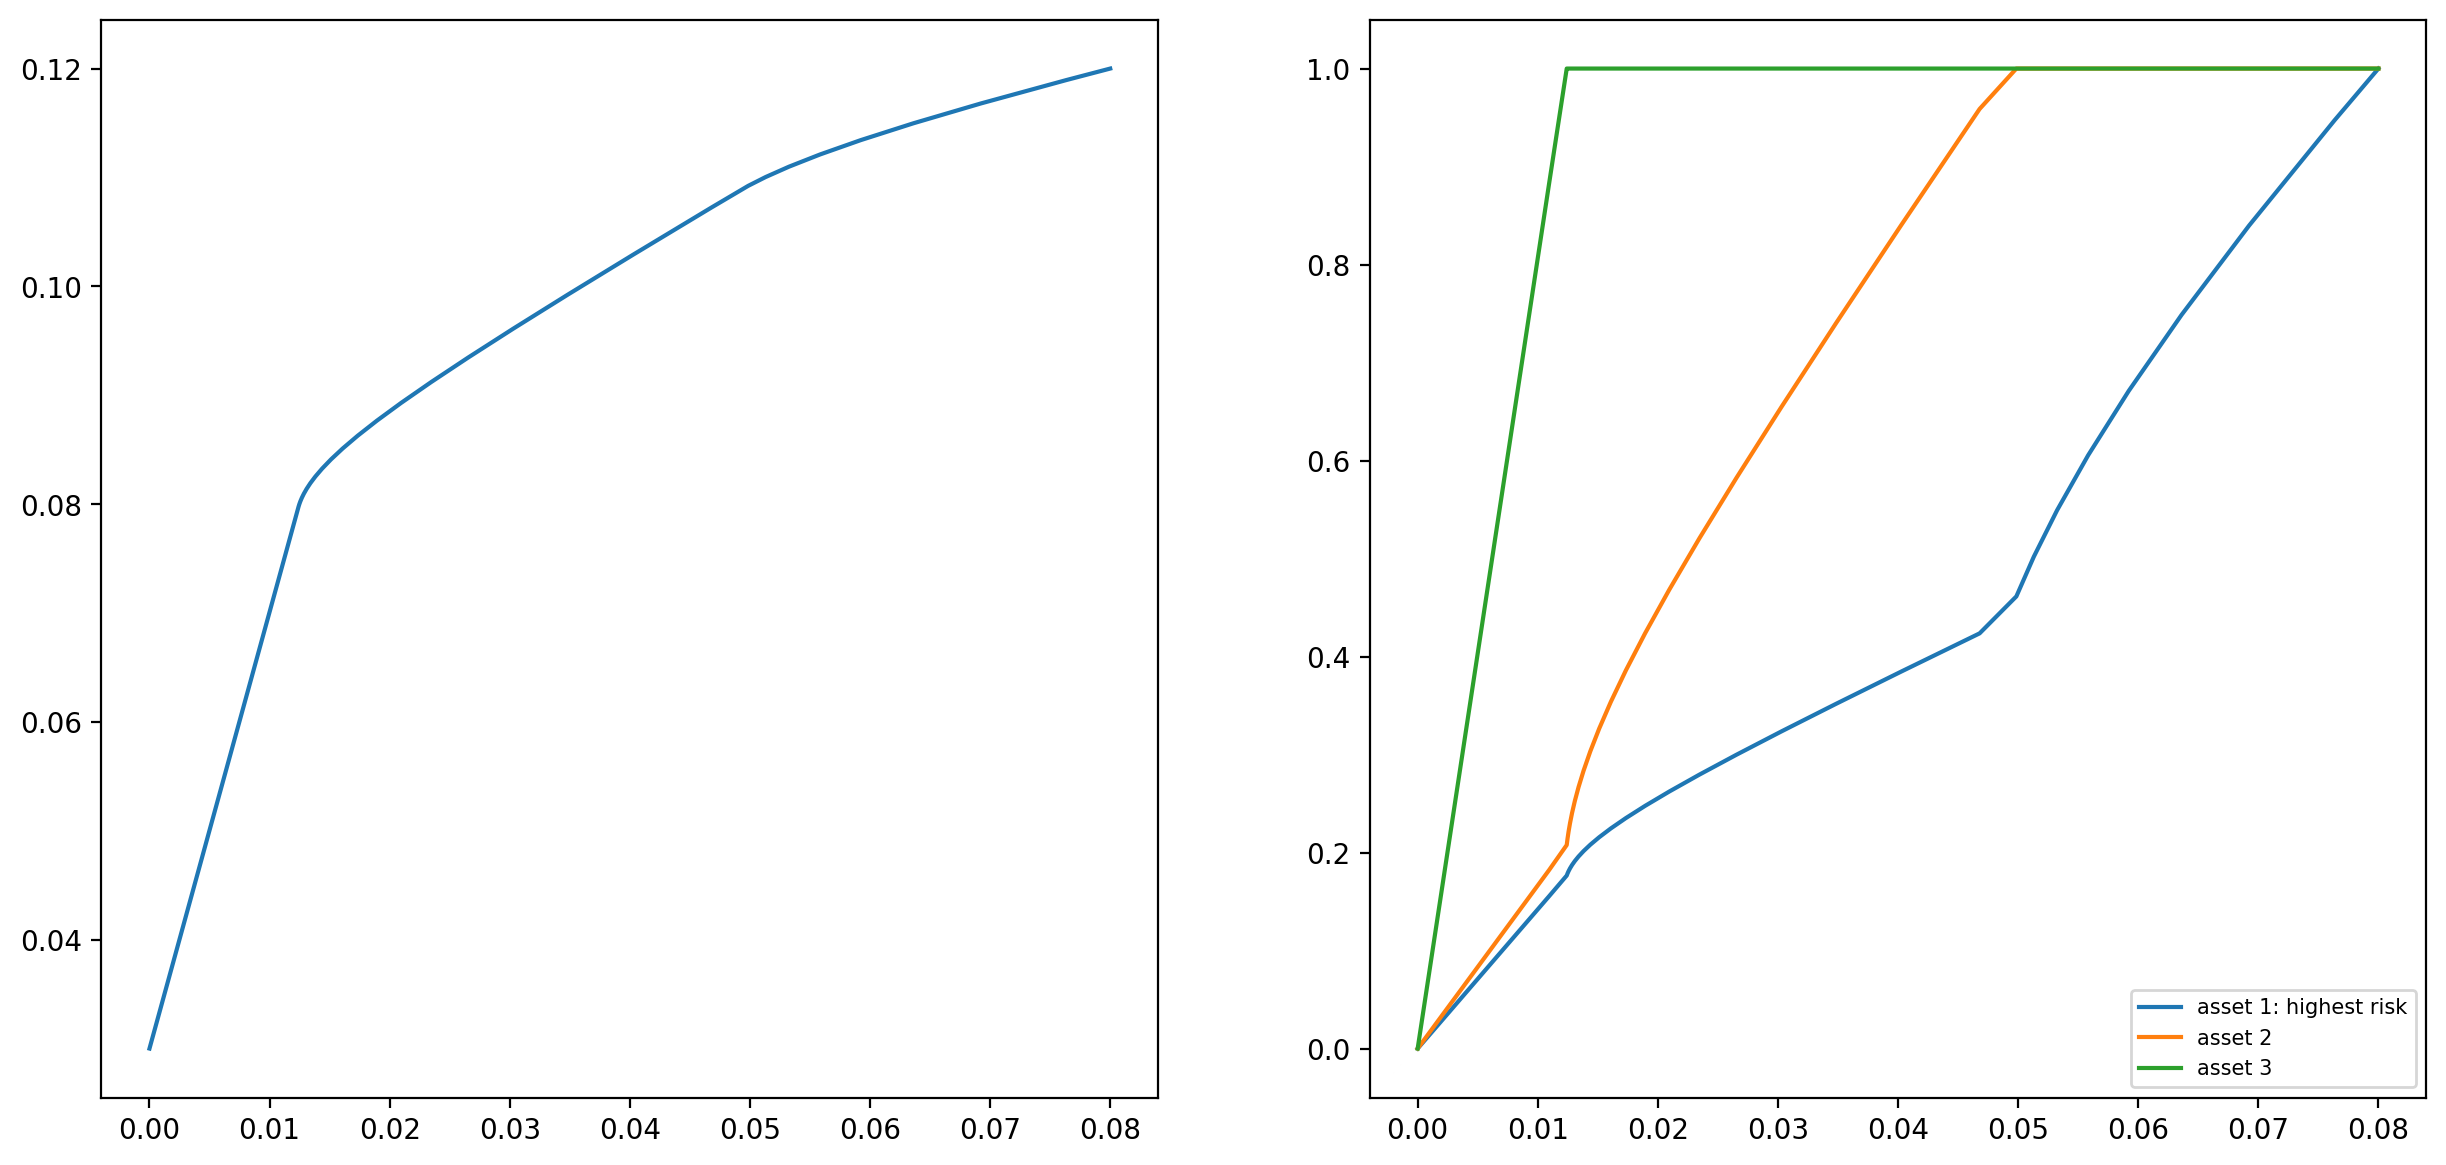

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rcParams['figure.figsize'] = (15, 7)
fig, ax = plt.subplots(1, 2)
ax[0].plot(optimal_std, expect_return)
ax[1].plot(optimal_std, w_opt[:,0], label='asset 1: highest risk')
ax[1].plot(optimal_std, w_opt[:,0] + w_opt[:,1], label = 'asset 2')
ax[1].plot(optimal_std, w_opt[:,0] + w_opt[:,1] + w_opt[:,2], label='asset 3')
ax[1].legend(fontsize = 7.5)
plt.show()

#높은 리스크를 감수할수록 asset 1(ex.파생상품)의 비중이 높아짐. 리스크가 0일때는 asset 4(ex.이자가 3%인 은행 예금)만 100%로 구성

### Q3-2.
이번에는 $p$를 평균이 $\bar{p}$, covariance가 $\Sigma$인 gaussian random variable이라고 가정했을 때, 다음 optimization problem을 표준정규분포의 cdf $\Phi(x)$와 그 inverse를 이용해 표현하고, 100개의 $\eta \in [10^{-4}, 10^{-1}]$에 대해 위 문제와 똑같은 그래프들을 그리세요. (이때 python 기준 `scipy.special.erfc, erfcinv`를 이용할 수 있습니다.)

$$
\begin{array}{ll}
    \text{maximize}   &\bar{p}^\top w\\
    \text{subject to} &\textbf{prob}(p^\top w \leq 0) \leq \eta \\
                      &1^\top w = 1,\,w \succeq 0
\end{array}
$$

In [15]:
from scipy.special import erfcinv
η = np.logspace(-4, -1, 100)
w = cp.Variable(shape = 4)

# maximize p @ w, subject to Pi(-p @ w / sqrt(w.T @ Sigma^(1/2) @ w)) <= eta (Pi is standard normal cdf) -> not DCP
# it is equivalent to maximize p @ w, subject to p @ w + Pi_inv(eta) * ||Sigma^(1/2) * w|| >= 0

vals, vectors = np.linalg.eig(Σ)
sqrt_Σ = vectors.T @ np.sqrt(np.diag(vals)) @ vectors # scipy.linalg.sqrtm을 이용해도 됩니다.

w_opt = np.zeros((100, 4))
expect_return = np.zeros(100)
optimal_std = np.zeros(100)


for i in range(100):
    γ = - np.sqrt(2) * erfcinv(2 * η[i]) #scipy.stats.norm을 이용해도 됩니다.
    objective = cp.Maximize(p @ w)
    constraints = [cp.sum(w) == 1, w >= 0, p @ w + γ * cp.norm(w @ sqrt_Σ) >= 0]
    prob = cp.Problem(objective, constraints)
    result = prob.solve()
    w_opt[i, :] = w.value
    expect_return[i] = p @ w.value
    optimal_std[i] = np.sqrt(w.value @ Σ @ w.value)

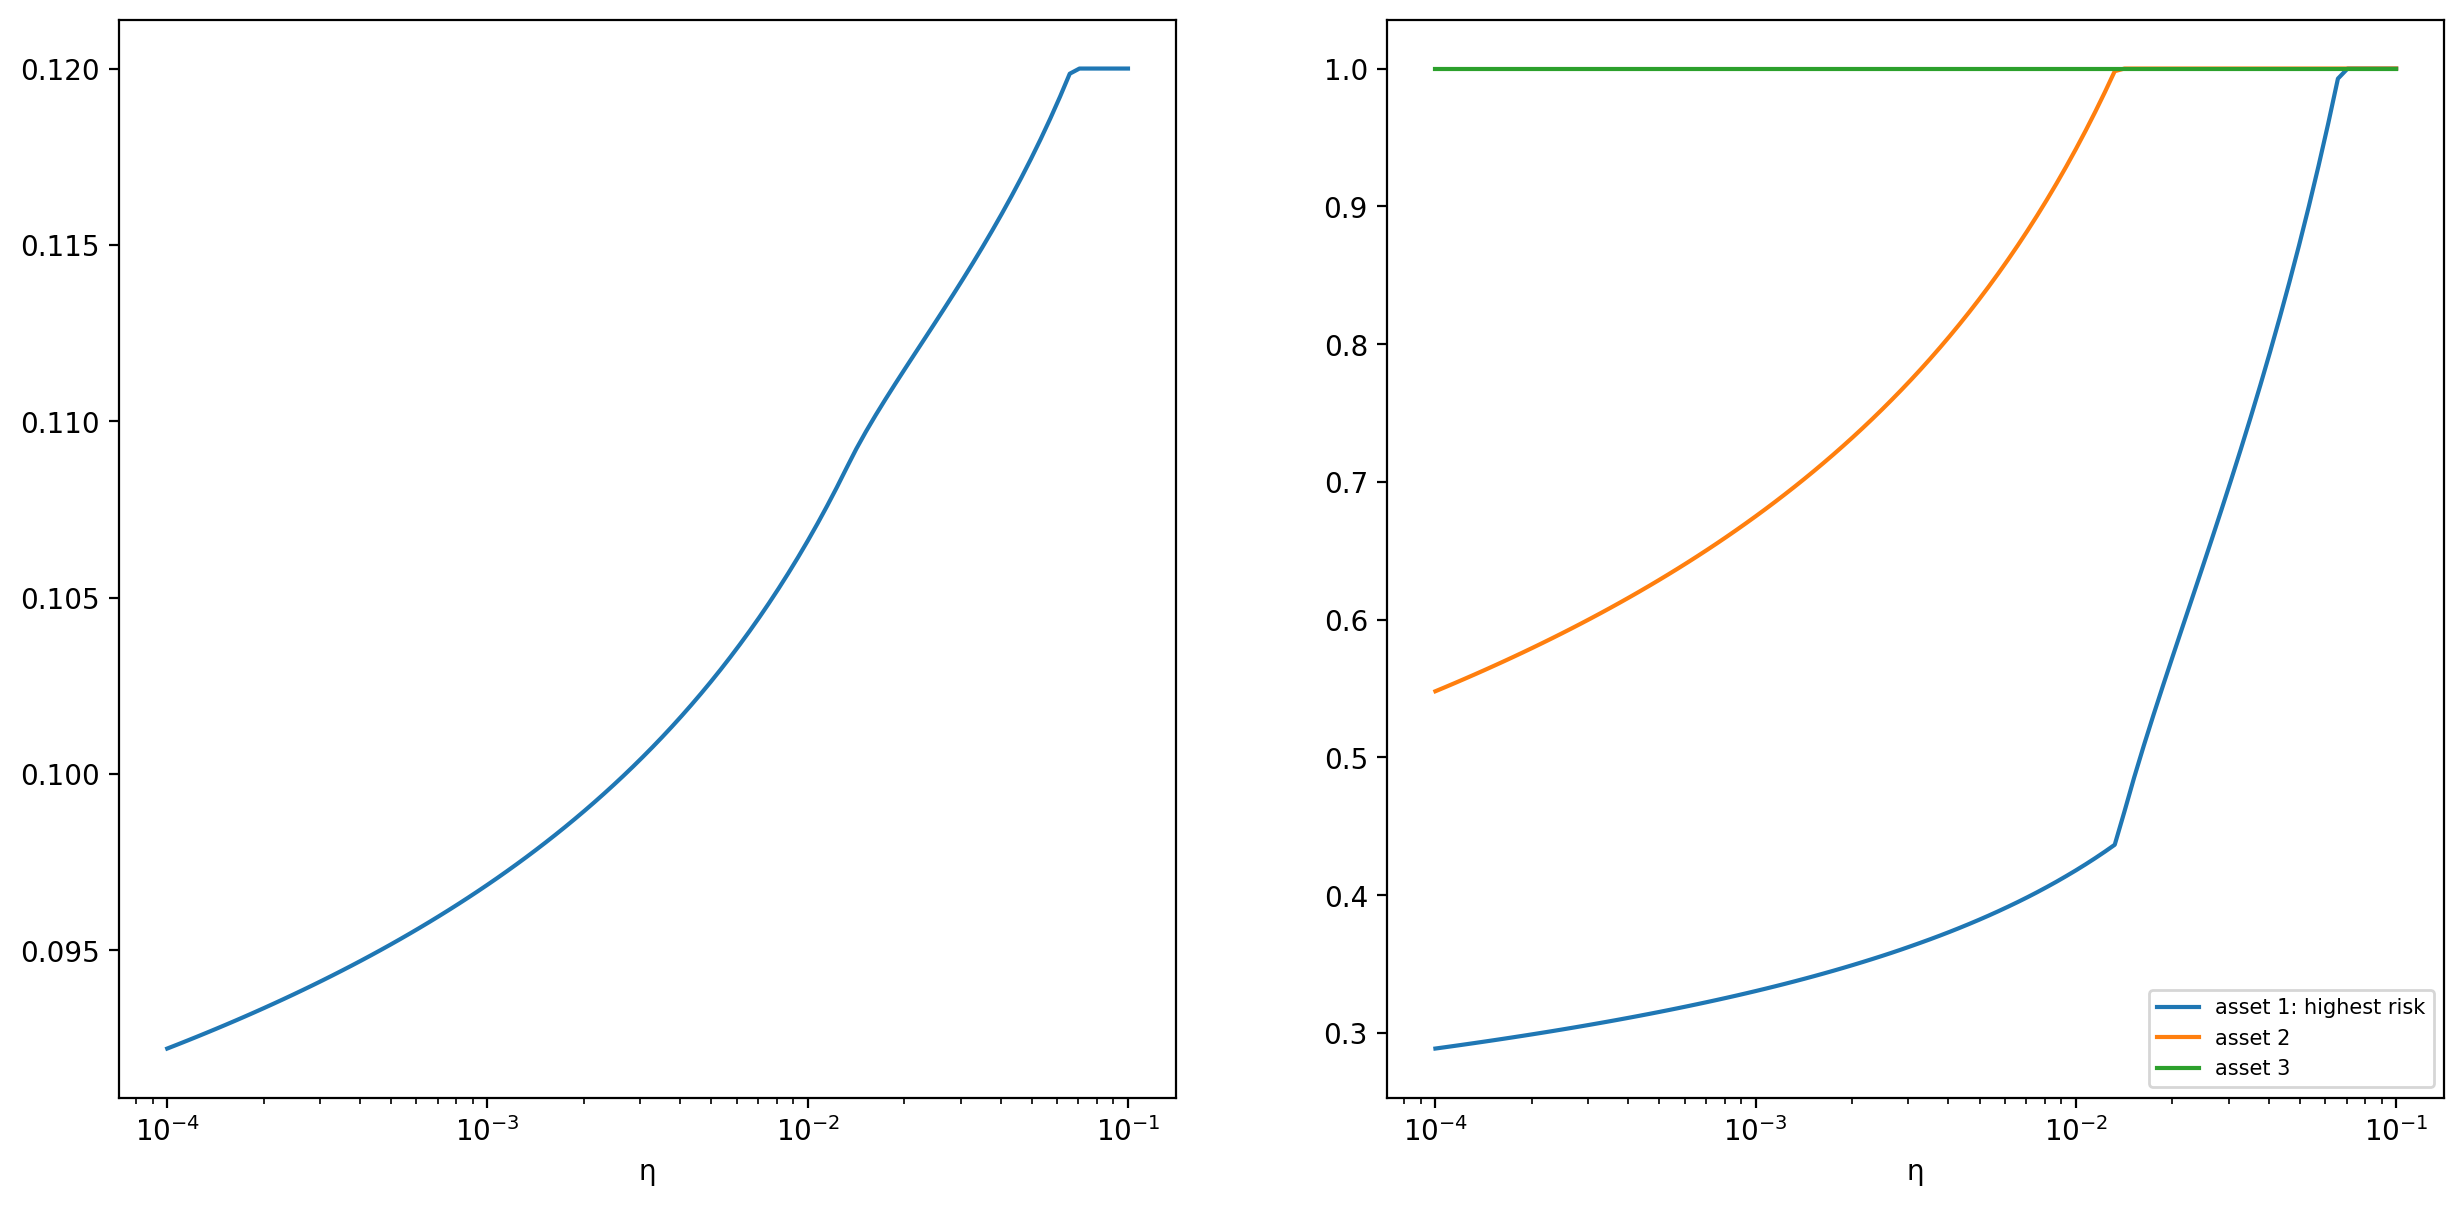

In [16]:
fig, ax = plt.subplots(1, 2)
ax[0].semilogx(η, expect_return)
ax[1].semilogx(η, w_opt[:,0], label='asset 1: highest risk')
ax[1].semilogx(η, w_opt[:,0] + w_opt[:,1], label='asset 2')
ax[1].semilogx(η, w_opt[:,0] + w_opt[:,1] + w_opt[:,2], label='asset 3')
ax[1].legend(fontsize = 7.5)
ax[0].set_xlabel('η')
ax[1].set_xlabel('η')
plt.show()

# 작은 실패(손해)확률 <-> 낮은 리스크를 선호할 경우 asset 3의 비중이 높음. 다만 실패 확률이 0이 아니므로 리스크를 감수 -> asset 4는 사지 않음.

### Q3-3.
$\eta = 0.05$로 정하고, 3-2의 문제를 10000번 시뮬레이션 하세요. $p^\top w$의 histogram을 그리고 평균을 계산한 뒤, 무슨 의미인지 설명하세요. 손실을 본 경우가 몇 번이나 되는지 세어 보세요.

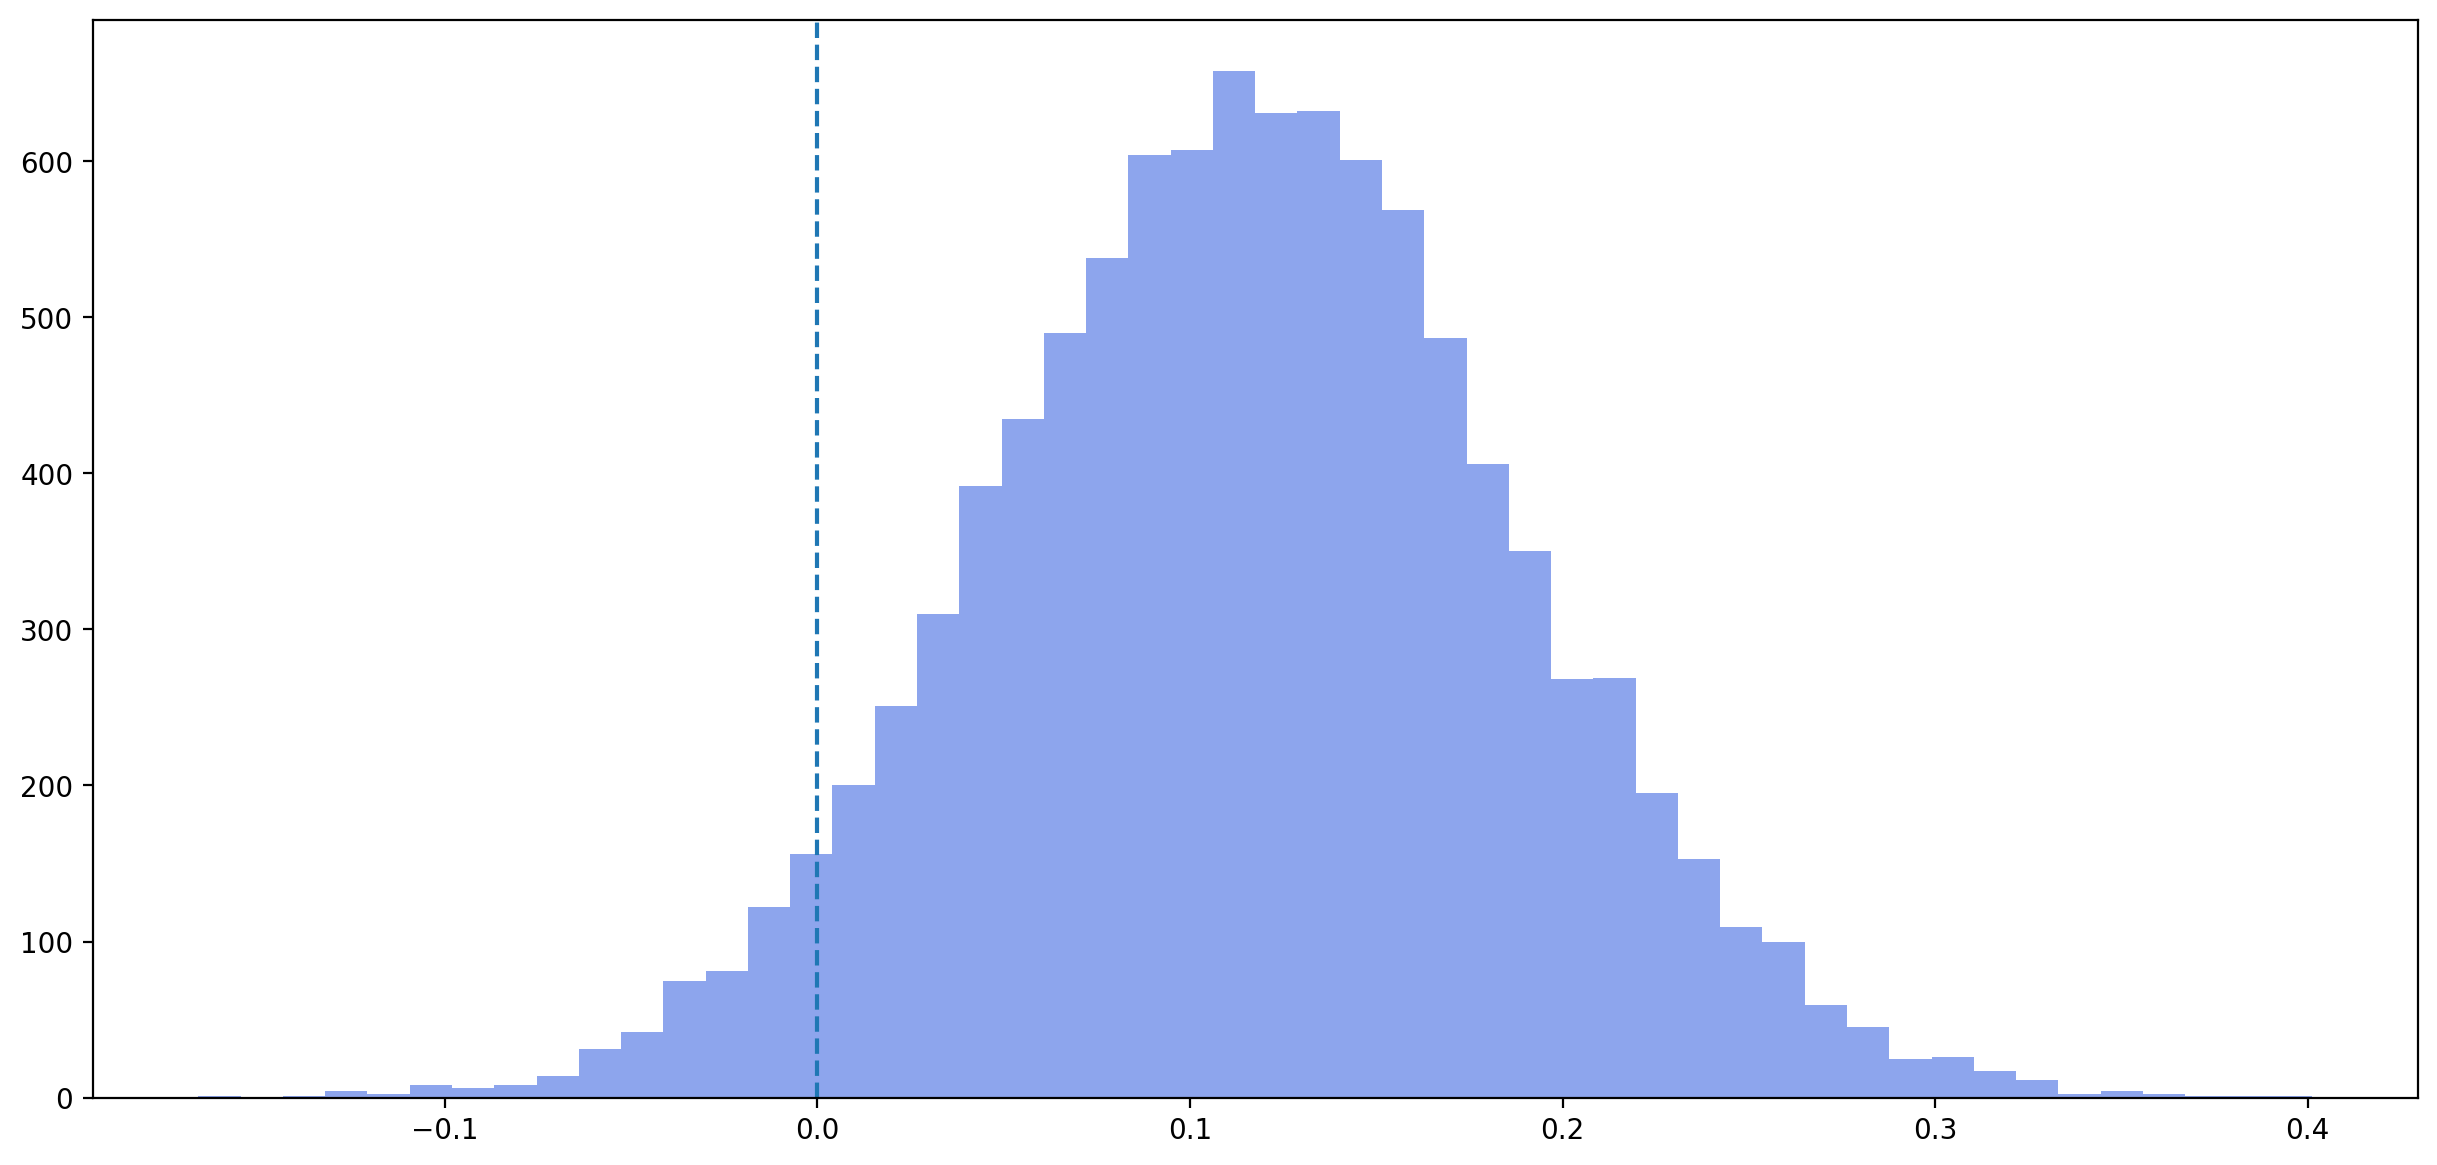

In [17]:
np.random.seed(1004)
η = 0.05
γ = - np.sqrt(2) * erfcinv(2 * η)
returns = np.zeros(10000)

objective = cp.Maximize(p @ w)
constraints = [cp.sum(w) == 1, w >= 0, p @ w + γ * cp.norm(w @ sqrt_Σ) >= 0]
prob = cp.Problem(objective, constraints)
result = prob.solve()
for i in range(10000):
    returns[i] = (p + sqrt_Σ @ np.random.randn(4)) @ w.value

plt.hist(returns, bins=50, alpha=0.6, color='royalblue')
plt.axvline(0, ls='--')
plt.show()

In [18]:
np.sum(returns < 0) / 10000

0.0498

## 4. Multiclass SVM

마지막으로 저번 세션에서 다뤘던 binary classification을 위한 SVM과 달리, 이번에는 multi-label 분류를 위한 SVM을 구현해 볼 것입니다. 기존  m개의 데이터 셋 $(x_i, y_i) \in R^n \times \left\{1,\,...,\,K\right\}$가 주어져 있습니다. classifier는 K개의 affine function인 $f_k(x) = w_k^\top x + b_k$로 이루어져 있습니다. 이것을 한데 모으면 $\mathbb{R}^n \rightarrow \mathbb{R}^K$인 linear transformation $Wx + b$가 됩니다. ($W$는 각각의 행이 $w_k^\top$인 행렬) feature vector $x_k$가 주어졌을 때 label $y$에 대한 추정값 $\hat{y}$는 $\arg \max_k{f_k(x)}$로 정의됩니다. 이 때 $f_k(x)$의 값에는 무조건 순서가 있다고 가정하고, 만약 값이 같다면 label을 임의로 선택한다고 가정합시다. 또 추가적으로 $\mathbf{1}^\top b = 0$이라는 조건을 넣겠습니다. (왜냐하면 $b$에 $c \times \mathbf{1}$을 더해도 classifier는 바뀌지 않기 때문입니다. 따라서 centering 해주었다고 보면 됩니다.)

Hinge loss function은 다음과 같이 정의됩니다.  (*$(u)_+$는 $\max(0, u)$를 나타냅니다.)

$$ L(W, b) = \sum_{i=1}^m \left(1 + \underset{k \neq y_i}{\max}f_k(x_i) - f_{y_i}(x_i) \right)_+$$ 


그리고 이것을 반영해 만든 목적 함수는 다음과 같습니다.

$$ L(W, b) + \lambda \lVert W \rVert_F $$

(*F는 **frobenius norm** (https://en.wikipedia.org/wiki/Matrix_norm 참고)를 나타냅니다.)

### Q4-1.
목적 함수가 이렇게 표현되는 이유를 설명하세요.

### Q4-2.
데이터 `q4` 모음에 대해 SVM을 구현하고, parameter $\lambda$값에 따른 test loss를 그림으로 그리세요.\
($\log_{10}\lambda$가 $[-2,2]$에 30개 일정한 간격으로 놓여 있다고 가정합시다.)

In [19]:
np.random.seed(0)
mTrain = 1000  
mTest = 100   
K = 10        
n = 20        
W_true = np.random.randn(K, n)
b_true = np.random.randn(K, 1)
v = 0.2 * np.random.randn(K, mTrain + mTest)  # noise
data = np.random.randn(n, mTrain + mTest)
label = np.argmax(W_true @ data + b_true + v, axis=0)

x = data[:, :mTrain]
y = label[:mTrain]

xtest = data[:, mTrain:]
ytest = label[mTrain:]

In [20]:
# pd.DataFrame(x).to_csv('q4.csv', index=False)
# pd.DataFrame(y).to_csv('q4y.csv', index=False)
# pd.DataFrame(xtest).to_csv('q4test.csv', index=False)
# pd.DataFrame(ytest).to_csv('q4ytest.csv', index=False)

In [21]:
from tqdm import tqdm

λ = np.logspace(-2, 2, 30)
errorTrain = []
errorTest = []


for i in tqdm(λ):
    W = cp.Variable((K, n))
    b = cp.Variable((K, 1))
    f = W @ x + b

    L = 0
    for k in range(K):
        ind = np.delete(np.arange(K), k)
        L += cp.sum(cp.pos(1 + cp.max(f[ind][:, y==k], axis=0) - f[k, y==k]))

    objective = cp.Minimize(L + i * cp.sum(cp.sum(W**2)))
    constraints = [cp.sum(b) == 0]
    problem = cp.Problem(objective, constraints)
    problem.solve(solver = cp.ECOS)
    
    indTrain = np.argmax(W.value @ x + b.value, axis=0)
    errorTrain.append(np.sum(indTrain != y) / mTrain)

    indTest = np.argmax(W.value @ xtest + b.value, axis=0)
    errorTest.append(np.sum(indTest != ytest) / mTest)

100%|███████████████████████████████████████████| 30/30 [03:31<00:00,  7.05s/it]


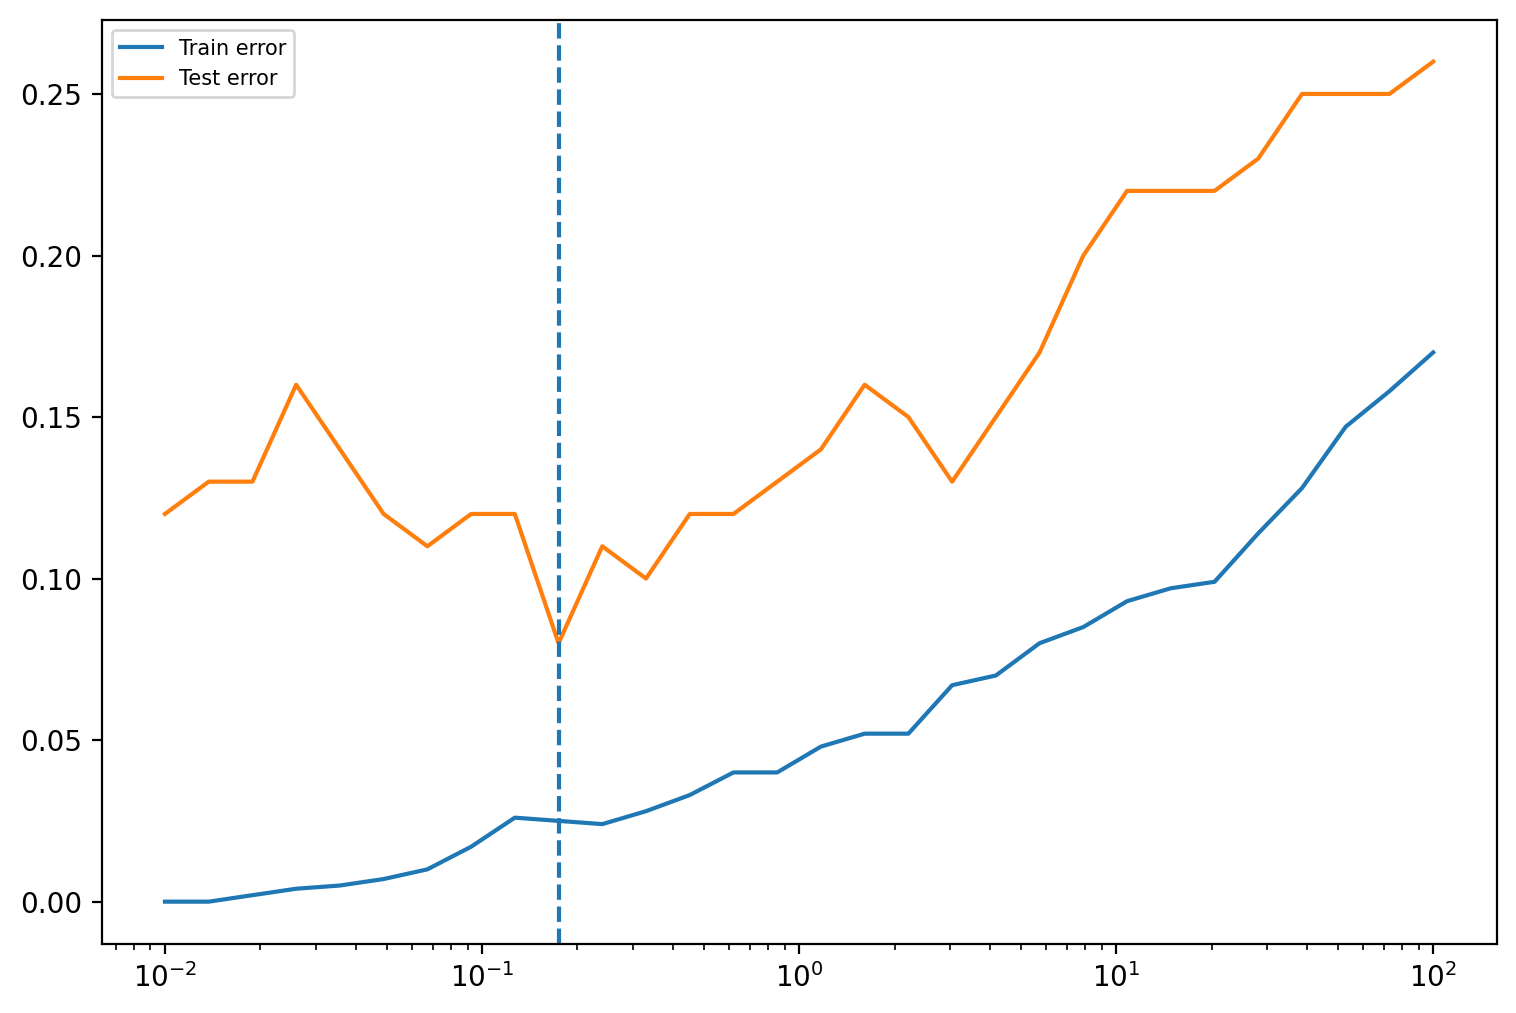

In [22]:
plt.rcParams['figure.figsize'] = (9, 6)
plt.semilogx(λ, errorTrain, label='Train error')
plt.semilogx(λ, errorTest, label='Test error')
plt.axvline(λ[np.argmin(errorTest)], ls='--')
plt.legend(fontsize = 7.5)
plt.show()